In [0]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import numpy as np
import pandas as pd
from numpy import array
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot

Using TensorFlow backend.


In [0]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [0]:
dataset = read_csv('cases.csv', header=0, index_col=0)
values = dataset.values

# ensure all data is float
values = values.astype('float32')
# normalize features

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 3, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[19,20,21,22,23]], axis=1, inplace=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
reframed = reframed.reset_index(drop=True)
reframed


,var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var6(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var6(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t)
0,0.000000,0.000000,0.00,0.000000,0.000000,0.554054,0.000000,0.326531,0.04,0.391753,0.459770,0.554054,0.002135,0.714286,0.08,0.659794,0.551724,0.824324,0.009456
1,0.000000,0.326531,0.04,0.391753,0.459770,0.554054,0.002135,0.714286,0.08,0.659794,0.551724,0.824324,0.009456,1.000000,0.12,1.000000,0.528736,1.000000,0.008083
2,0.002135,0.714286,0.08,0.659794,0.551724,0.824324,0.009456,1.000000,0.12,1.000000,0.528736,1.000000,0.008083,0.877551,0.18,0.886598,0.448276,0.797297,0.014793
3,0.009456,1.000000,0.12,1.000000,0.528736,1.000000,0.008083,0.877551,0.18,0.886598,0.448276,0.797297,0.014793,0.724490,0.12,0.649485,0.321839,0.486487,0.014183
4,0.008083,0.877551,0.18,0.886598,0.448276,0.797297,0.014793,0.724490,0.12,0.649485,0.321839,0.486487,0.014183,0.551020,0.10,0.484536,0.206897,0.243243,0.011896
5,0.014793,0.724490,0.12,0.649485,0.321839,0.486487,0.014183,0.551020,0.10,0.484536,0.206897,0.243243,0.011896,0.469388,0.08,0.360825,0.172414,0.189189,0.038127
6,0.014183,0.551020,0.10,0.484536,0.206897,0.243243,0.011896,0.469388,0.08,0.360825,0.172414,0.189189,0.038127,0.397959,0.06,0.309278,0.195402,0.067568,0.036297
7,0.011896,0.469388,0.08,0.360825,0.172414,0.189189,0.038127,0.397959,0.06,0.309278,0.195402,0.067568,0.036297,0.408163,0.08,0.298969,0.264368,0.135135,0.036602
8,0.038127,0.397959,0.06,0.309278,0.195402,0.067568,0.036297,0.408163,0.08,0.298969,0.264368,0.135135,0.036602,0.377551,0.08,0.268041,0.321839,0.054054,0.085557
9,0.036297,0.408163,0.08,0.298969,0.264368,0.135135,0.036602,0.377551,0.08,0.268041,0.321839,0.054054,0.085557,0.387755,0.12,0.247423,0.241379,0.000000,0.052921


In [0]:
values = reframed.values
train = values[:50, :]
test = values[50:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 3, 6))
test_X = test_X.reshape((test_X.shape[0], 3, 6))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(50, 3, 6) (50,) (8, 3, 6) (8,)


In [0]:
print(train_X.shape[0])
print(test_X.shape[0])

50
8


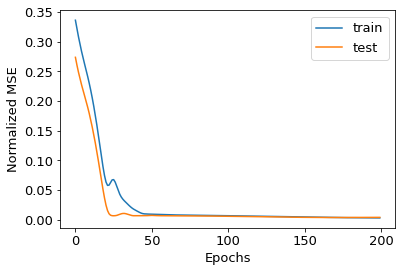

In [0]:
model = Sequential()
model.add(LSTM(50,activation='relu',return_sequences=True,input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=200, validation_data=(test_X, test_y), verbose=0, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Normalized MSE')
pyplot.legend()
pyplot.show()

In [0]:
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 18))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -5:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -5:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 461.921


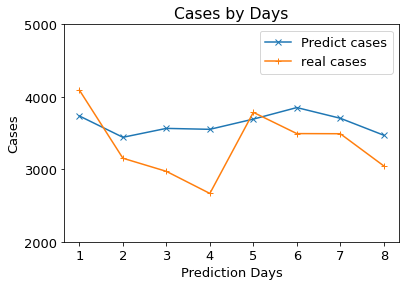

In [0]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
x = range(1,9)
plt.plot(x,inv_yhat ,"x-",label="Predict cases")
plt.plot(x,inv_y,"+-",label="real cases")
plt.title('Cases by Days')
plt.xlabel('Prediction Days')
plt.ylabel('Cases');

plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.5)

yticks = range(2000,5500,1000)
ax.set_yticks(yticks)
plt.rcParams.update({'font.size': 13})
plt.show()